In [97]:
import pandas as pd
import numpy as np
import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [98]:
beta_peakf_lfp0 = pd.read_csv('data/beta_peak_freq_lfp0.csv')
beta_peakf_lfp0.index = ['beta_peakf_lfp0']
beta_peakf_lfp0 = beta_peakf_lfp0.T

In [99]:
# Extract the index from beta_peakf_lfp0
row_index = beta_peakf_lfp0.index
row_index

Index(['p1_x1', 'p1_x2', 'p2_x1', 'p2_x2', 'p2_x3', 'p2_x4', 'p2_x5', 'p2_x6',
       'p2_x7', 'p2_x8', 'p2_x9', 'p2_x10', 'p2_x11', 'p2_x12', 'p3_x1',
       'p3_x2', 'p3_x3', 'p4_x1', 'p4_x2', 'p4_x3', 'p4_x4', 'p4_x5', 'p4_x6',
       'p5_x1', 'p5_x2', 'p5_x3', 'p6_x1', 'p6_x2', 'p6_x3', 'p6_x4', 'p6_x5',
       'p6_x6', 'p6_x7', 'p6_x8', 'p6_x9', 'p6_x10', 'p6_x11', 'p6_x12',
       'p7_x1', 'p7_x2', 'p7_x3', 'p7_x4', 'p7_x5', 'p7_x6', 'p8_x1', 'p8_x2',
       'p8_x3', 'p8_x4', 'p8_x5', 'p8_x6', 'p9_x1', 'p9_x2', 'p9_x3', 'p9_x4',
       'p9_x5', 'p9_x6', 'p9_x7', 'p9_x8', 'p9_x9', 'p9_x10', 'p9_x11',
       'p9_x12', 'p10_x1', 'p10_x2', 'p10_x3', 'p10_x4', 'p10_x5', 'p10_x6',
       'p10_x7', 'p10_x8', 'p11_x1', 'p11_x2', 'p11_x3', 'p11_x4', 'p11_x5',
       'p11_x6', 'p11_x7', 'p11_x8', 'p11_x9', 'p12_x1', 'p12_x2', 'p12_x3',
       'p12_x4', 'p12_x5', 'p12_x6', 'p12_x7', 'p12_x8'],
      dtype='object')

In [100]:
data_df = pd.read_csv('data_df.csv')

In [101]:
data_df

,beta_peakf_lfp0,beta_peakf_lfp2,beta_power_lfp0,beta_power_lfp2,power_diff,power_ratio,hb_lfp0,hb_lfp2,skewness_lfp0,skewness_lfp2,...,mean_bbd_lfp0,mean_bbd_lfp2,beta_power_asymmetry,pac_lfp0,pac_lfp2,beta_power_stab_lfp0,beta_power_stab_lfp2,cfc_lfp0,cfc_lfp2,motor_score
0,22.031598,14.215586,10.306337,3.533068,-6.773268,0.342805,0.498136,0.491980,-0.057924,-0.047028,...,0.005818,0.006168,-0.489419,0.000336,0.000315,1.317437,0.355230,0.168406,0.057127,83.108824
1,27.151257,17.935871,33.170136,13.945194,-19.224942,0.420414,0.581697,0.446251,-0.057419,-0.002274,...,0.004996,0.006865,-0.408040,0.000287,0.000387,3.298529,2.201226,0.234405,0.125486,96.458592
2,15.768549,14.744617,8.837351,2.358031,-6.479320,0.266826,0.478597,0.479173,-0.039276,-0.043310,...,0.006607,0.005760,-0.578749,0.000245,0.000192,4.022782,0.084029,0.073433,0.029659,148.599056
3,27.953336,16.212253,10.999450,3.827034,-7.172416,0.347930,0.538728,0.483530,-0.065004,0.039480,...,0.005402,0.005882,-0.483757,0.000163,0.000672,2.215428,0.303450,0.089324,0.069670,126.365803
4,15.273648,15.068862,8.863708,5.996212,-2.867496,0.676490,0.506189,0.482051,-0.018205,-0.009594,...,0.006132,0.006375,-0.192968,0.000326,0.000326,4.021380,1.506637,0.086111,0.081557,105.526208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,15.307779,15.137124,8.900126,12.783154,3.883029,1.436289,0.453625,0.446491,0.089313,0.070543,...,0.006546,0.006919,0.179079,0.000483,0.000372,0.564778,1.771462,0.076364,0.112628,131.200587
83,22.270515,14.027865,11.388082,5.944366,-5.443716,0.521981,0.482976,0.464413,0.029357,0.069305,...,0.005726,0.007660,-0.314077,0.000342,0.000301,1.570627,0.451661,0.112323,0.079401,233.384897
84,22.031598,15.683221,10.161668,5.935931,-4.225737,0.584149,0.496593,0.471133,0.058958,-0.008529,...,0.006100,0.007712,-0.262507,0.000327,0.000615,1.337872,0.871259,0.095936,0.094112,188.739309
85,22.304646,15.188321,10.731291,5.376945,-5.354346,0.501053,0.489711,0.483125,0.068516,0.017908,...,0.006159,0.008102,-0.332398,0.000436,0.000636,1.816824,0.505013,0.125528,0.115754,127.114523


In [103]:
data_df = data_df.set_index(row_index)
data_df

,beta_peakf_lfp0,beta_peakf_lfp2,beta_power_lfp0,beta_power_lfp2,power_diff,power_ratio,hb_lfp0,hb_lfp2,skewness_lfp0,skewness_lfp2,...,mean_bbd_lfp0,mean_bbd_lfp2,beta_power_asymmetry,pac_lfp0,pac_lfp2,beta_power_stab_lfp0,beta_power_stab_lfp2,cfc_lfp0,cfc_lfp2,motor_score
p1_x1,22.031598,14.215586,10.306337,3.533068,-6.773268,0.342805,0.498136,0.491980,-0.057924,-0.047028,...,0.005818,0.006168,-0.489419,0.000336,0.000315,1.317437,0.355230,0.168406,0.057127,83.108824
p1_x2,27.151257,17.935871,33.170136,13.945194,-19.224942,0.420414,0.581697,0.446251,-0.057419,-0.002274,...,0.004996,0.006865,-0.408040,0.000287,0.000387,3.298529,2.201226,0.234405,0.125486,96.458592
p2_x1,15.768549,14.744617,8.837351,2.358031,-6.479320,0.266826,0.478597,0.479173,-0.039276,-0.043310,...,0.006607,0.005760,-0.578749,0.000245,0.000192,4.022782,0.084029,0.073433,0.029659,148.599056
p2_x2,27.953336,16.212253,10.999450,3.827034,-7.172416,0.347930,0.538728,0.483530,-0.065004,0.039480,...,0.005402,0.005882,-0.483757,0.000163,0.000672,2.215428,0.303450,0.089324,0.069670,126.365803
p2_x3,15.273648,15.068862,8.863708,5.996212,-2.867496,0.676490,0.506189,0.482051,-0.018205,-0.009594,...,0.006132,0.006375,-0.192968,0.000326,0.000326,4.021380,1.506637,0.086111,0.081557,105.526208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p12_x4,15.307779,15.137124,8.900126,12.783154,3.883029,1.436289,0.453625,0.446491,0.089313,0.070543,...,0.006546,0.006919,0.179079,0.000483,0.000372,0.564778,1.771462,0.076364,0.112628,131.200587
p12_x5,22.270515,14.027865,11.388082,5.944366,-5.443716,0.521981,0.482976,0.464413,0.029357,0.069305,...,0.005726,0.007660,-0.314077,0.000342,0.000301,1.570627,0.451661,0.112323,0.079401,233.384897
p12_x6,22.031598,15.683221,10.161668,5.935931,-4.225737,0.584149,0.496593,0.471133,0.058958,-0.008529,...,0.006100,0.007712,-0.262507,0.000327,0.000615,1.337872,0.871259,0.095936,0.094112,188.739309
p12_x7,22.304646,15.188321,10.731291,5.376945,-5.354346,0.501053,0.489711,0.483125,0.068516,0.017908,...,0.006159,0.008102,-0.332398,0.000436,0.000636,1.816824,0.505013,0.125528,0.115754,127.114523


In [104]:
data_df.shape

(87, 25)

### Preparing Data X and y

In [105]:
target = ['motor_score']

features = ['beta_peakf_lfp0','beta_peakf_lfp2','beta_power_lfp0', 
            'beta_power_lfp2', 'power_diff', 'power_ratio', 'hb_lfp0',
            'hb_lfp2','skewness_lfp0','skewness_lfp2','kurtosis_lfp0',
            'kurtosis_lfp2', 'sh_entropy_lfp0','sh_entropy_lfp2',
            'beta_band_coherence','mean_bbd_lfp0','mean_bbd_lfp2','beta_power_asymmetry',
            'pac_lfp0','pac_lfp2','beta_power_stab_lfp0','beta_power_stab_lfp2','cfc_lfp0','cfc_lfp2']

X = data_df.drop(columns=target)
X

,beta_peakf_lfp0,beta_peakf_lfp2,beta_power_lfp0,beta_power_lfp2,power_diff,power_ratio,hb_lfp0,hb_lfp2,skewness_lfp0,skewness_lfp2,...,beta_band_coherence,mean_bbd_lfp0,mean_bbd_lfp2,beta_power_asymmetry,pac_lfp0,pac_lfp2,beta_power_stab_lfp0,beta_power_stab_lfp2,cfc_lfp0,cfc_lfp2
p1_x1,22.031598,14.215586,10.306337,3.533068,-6.773268,0.342805,0.498136,0.491980,-0.057924,-0.047028,...,0.156163,0.005818,0.006168,-0.489419,0.000336,0.000315,1.317437,0.355230,0.168406,0.057127
p1_x2,27.151257,17.935871,33.170136,13.945194,-19.224942,0.420414,0.581697,0.446251,-0.057419,-0.002274,...,0.146289,0.004996,0.006865,-0.408040,0.000287,0.000387,3.298529,2.201226,0.234405,0.125486
p2_x1,15.768549,14.744617,8.837351,2.358031,-6.479320,0.266826,0.478597,0.479173,-0.039276,-0.043310,...,0.146502,0.006607,0.005760,-0.578749,0.000245,0.000192,4.022782,0.084029,0.073433,0.029659
p2_x2,27.953336,16.212253,10.999450,3.827034,-7.172416,0.347930,0.538728,0.483530,-0.065004,0.039480,...,0.142263,0.005402,0.005882,-0.483757,0.000163,0.000672,2.215428,0.303450,0.089324,0.069670
p2_x3,15.273648,15.068862,8.863708,5.996212,-2.867496,0.676490,0.506189,0.482051,-0.018205,-0.009594,...,0.157079,0.006132,0.006375,-0.192968,0.000326,0.000326,4.021380,1.506637,0.086111,0.081557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p12_x4,15.307779,15.137124,8.900126,12.783154,3.883029,1.436289,0.453625,0.446491,0.089313,0.070543,...,0.150387,0.006546,0.006919,0.179079,0.000483,0.000372,0.564778,1.771462,0.076364,0.112628
p12_x5,22.270515,14.027865,11.388082,5.944366,-5.443716,0.521981,0.482976,0.464413,0.029357,0.069305,...,0.156515,0.005726,0.007660,-0.314077,0.000342,0.000301,1.570627,0.451661,0.112323,0.079401
p12_x6,22.031598,15.683221,10.161668,5.935931,-4.225737,0.584149,0.496593,0.471133,0.058958,-0.008529,...,0.151415,0.006100,0.007712,-0.262507,0.000327,0.000615,1.337872,0.871259,0.095936,0.094112
p12_x7,22.304646,15.188321,10.731291,5.376945,-5.354346,0.501053,0.489711,0.483125,0.068516,0.017908,...,0.163494,0.006159,0.008102,-0.332398,0.000436,0.000636,1.816824,0.505013,0.125528,0.115754


In [106]:
y = data_df[target]
y

,motor_score
p1_x1,83.108824
p1_x2,96.458592
p2_x1,148.599056
p2_x2,126.365803
p2_x3,105.526208
...,...
p12_x4,131.200587
p12_x5,233.384897
p12_x6,188.739309
p12_x7,127.114523


### Data Augmentation

In [107]:
# Function to augment data by adding noise and shifts
def augment_data(X, y, noise_factor, shift_value):
    # Add Gaussian noise to X
    X_noisy = X + np.random.normal(0, noise_factor, X.shape)
    
    # Shift X values
    X_shifted = X + shift_value
    
    # Combine original, noisy, and shifted data
    X_augmented = pd.concat([X, X_noisy, X_shifted], axis=0).reset_index(drop=True)
    y_augmented = pd.concat([y, y, y], axis=0).reset_index(drop=True)
    
    return X_augmented, y_augmented

# Augment the data
X_augmented, y_augmented = augment_data(X, y, noise_factor=0.1, shift_value=0.1)

# Show the augmented data
print(X_augmented)
print(y_augmented)

     beta_peakf_lfp0  beta_peakf_lfp2  beta_power_lfp0  beta_power_lfp2  \
0          22.031598        14.215586        10.306337         3.533068   
1          27.151257        17.935871        33.170136        13.945194   
2          15.768549        14.744617         8.837351         2.358031   
3          27.953336        16.212253        10.999450         3.827034   
4          15.273648        15.068862         8.863708         5.996212   
..               ...              ...              ...              ...   
256        15.407779        15.237124         9.000126        12.883154   
257        22.370515        14.127865        11.488082         6.044366   
258        22.131598        15.783221        10.261668         6.035931   
259        22.404646        15.288321        10.831291         5.476945   
260        15.339517        18.445444        11.444519         7.240918   

     power_diff  power_ratio   hb_lfp0   hb_lfp2  skewness_lfp0  \
0     -6.773268     0.342805  0.

#### Data Splitting X_train, X_test, y_train, y_test

In [108]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

# Initializing a scaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)

print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (208, 24)
Shape of y_train (208, 1)
Shape of X_test (53, 24)
Shape of y_test (53, 1)


### Feature Importance

c:\Users\Ali Aftab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


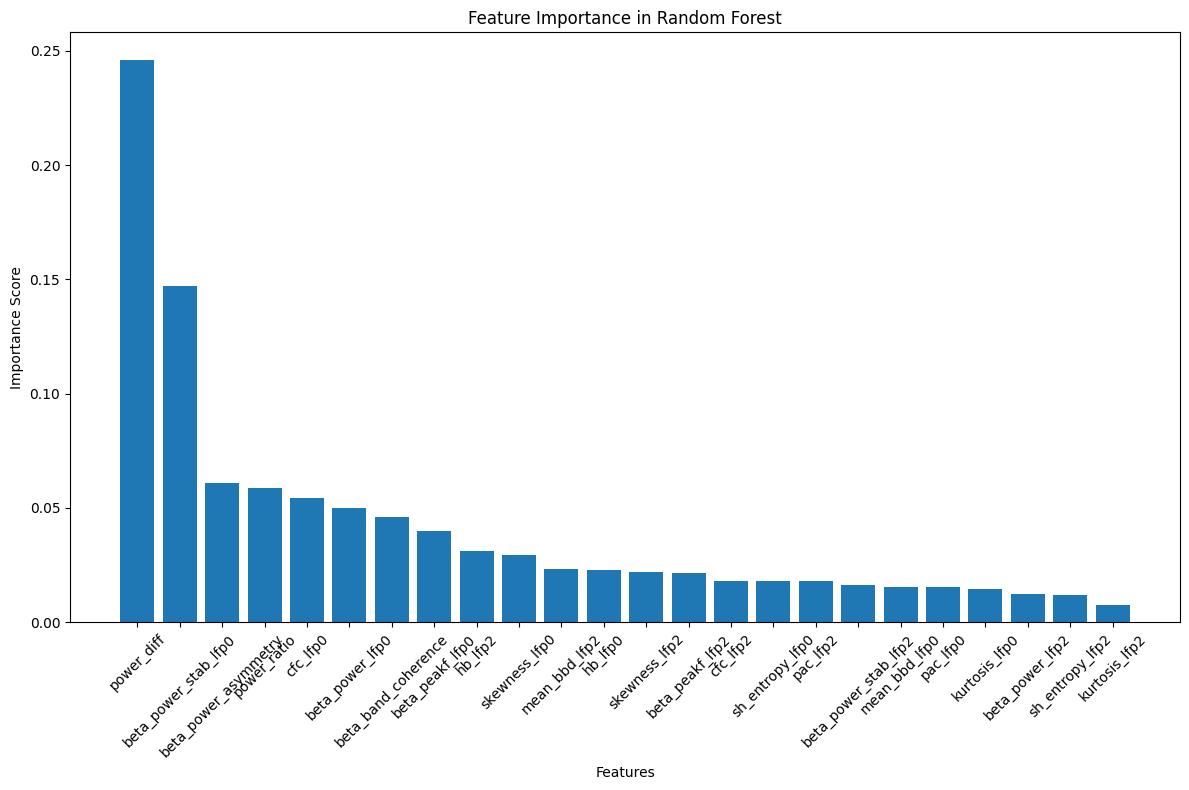

power_diff: 0.2458
beta_power_stab_lfp0: 0.1469
beta_power_asymmetry: 0.0610
power_ratio: 0.0586
cfc_lfp0: 0.0544
beta_power_lfp0: 0.0498
beta_band_coherence: 0.0460
beta_peakf_lfp0: 0.0400
hb_lfp2: 0.0311
skewness_lfp0: 0.0293
mean_bbd_lfp2: 0.0231
hb_lfp0: 0.0228
skewness_lfp2: 0.0219
beta_peakf_lfp2: 0.0215
cfc_lfp2: 0.0182
sh_entropy_lfp0: 0.0180
pac_lfp2: 0.0180
beta_power_stab_lfp2: 0.0162
mean_bbd_lfp0: 0.0154
pac_lfp0: 0.0154
kurtosis_lfp0: 0.0146
beta_power_lfp2: 0.0123
sh_entropy_lfp2: 0.0121
kurtosis_lfp2: 0.0076


In [110]:
# Train the Random Forest Regressor (using the previous code)
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=20, random_state=42)
rf_model.fit(X, y)

# Extract feature importance values
feature_importances = rf_model.feature_importances_

# Create a bar plot for feature importance
features = ['beta_peakf_lfp0','beta_peakf_lfp2','beta_power_lfp0',
            'beta_power_lfp2', 'power_diff', 'power_ratio', 'hb_lfp0',
            'hb_lfp2','skewness_lfp0','skewness_lfp2','kurtosis_lfp0',
            'kurtosis_lfp2','sh_entropy_lfp0','sh_entropy_lfp2','beta_band_coherence',
            'mean_bbd_lfp0','mean_bbd_lfp2','beta_power_asymmetry','pac_lfp0','pac_lfp2',
            'beta_power_stab_lfp0','beta_power_stab_lfp2','cfc_lfp0','cfc_lfp2']
indices = np.argsort(feature_importances)[::-1]  # Sorting feature importance values in descending order

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(features)[indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# Print the importance of each feature
for i in range(len(features)):
    print(f"{features[indices[i]]}: {feature_importances[indices[i]]:.4f}")